In [7]:
1.

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv(r'C:\Users\preet\Documents\GL\TelcomCustomer-Churn.csv')

In [8]:
2.

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


df.info()

In [10]:
3.

def check_missing_values(df):
    print("percentage of missing data of dataframe \n",df.isnull().sum()/len(df)*100)
    
check_missing_values(df)

percentage of missing data of dataframe 
 customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


In [11]:
4.

def check_duplicate(df):
    duplicate=df[df.duplicated()]
    return duplicate

duplicate=check_duplicate(df)
duplicate

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [12]:
5.

df.drop('customerID',axis=1,inplace=True)

In [13]:
6.

object_type_variables = [i for i in df.columns if df.dtypes[i] == object]
object_type_variables 


le = LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q = le.fit_transform(df[i].astype(str))  
        df[i] = q                               
        df[i] = df[i].astype(int)
encoder(df)

In [14]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0


In [61]:
7.

dfs = pd.read_csv(r'C:\Users\preet\Documents\GL\TelcomCustomer-Churn.csv')

dfs['TotalCharges'] = pd.to_numeric(dfs['TotalCharges'],errors='coerce')

## Checking the statistical summary of the numerical variables
dfs.select_dtypes(include=np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [62]:
## checking the statistical summary of the categorical variables
##dfc.select_dtypes(include=category).describe().T

dfs.select_dtypes(include='O').describe()


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


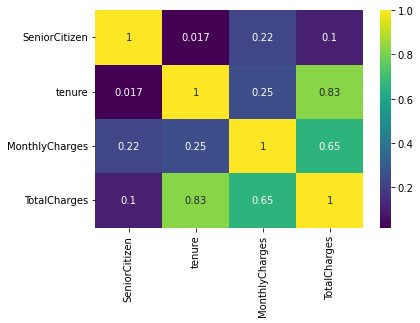

In [63]:
sns.heatmap(dfs.corr(),annot=True,cmap='viridis')
plt.show()

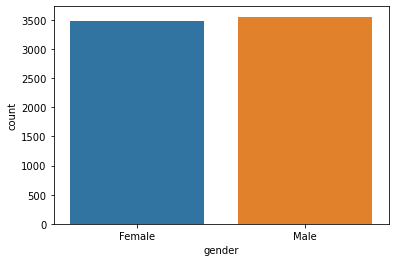

In [64]:
## Checking the gender distribution
sns.countplot(dfs['gender'])
plt.show()

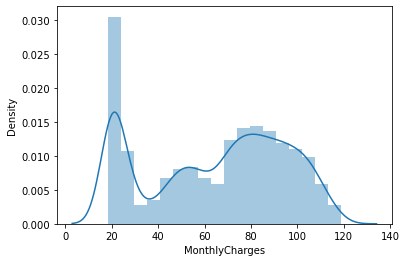

In [66]:
##Checking the distribution of the column monthly charges and total charges.
sns.distplot(dfs['MonthlyCharges'])
plt.show()

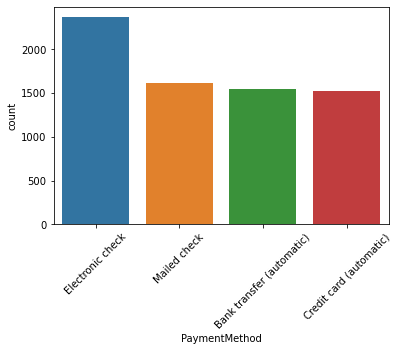

In [67]:
## Checking the distribution of the different PaymentMethod.
sns.countplot(dfs['PaymentMethod'])
plt.xticks(rotation=45)
plt.show()

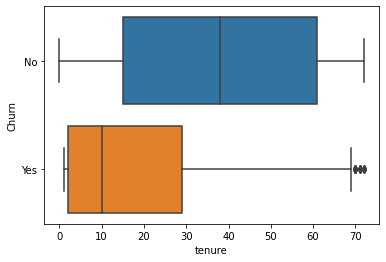

In [68]:
## Checking how churn interacts with tenure
sns.boxplot(dfs['tenure'],dfs['Churn'])
plt.show()

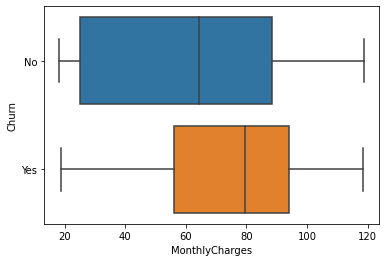

In [69]:
## Checking the relationship monthlycharges Vs tenure
sns.boxplot(dfs['MonthlyCharges'],dfs['Churn'])
plt.show()

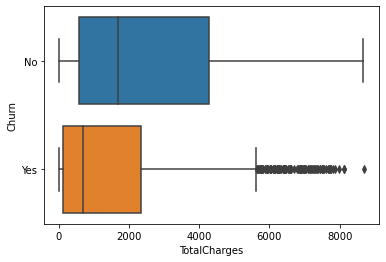

In [70]:
## Checking the relationship TotalCharges Vs tenure
sns.boxplot(dfs['TotalCharges'],dfs['Churn'])
plt.show()

In [72]:
8.

X = df.drop(['Churn'],axis=1)  
y = df['Churn'] 

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [73]:
9.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)  

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [74]:
10.

ss = StandardScaler()
X_train.iloc[:,:] = ss.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = ss.transform(X_test.iloc[:,:])

In [75]:
X_train.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1768,-0.999189,-0.440447,-0.971205,-0.661617,1.242334,0.330698,-0.994822,-1.179622,-0.912353,-1.028900,1.230888,-0.922965,-1.113972,1.141887,0.367913,-1.202263,-0.524973,-0.212682,-0.126413
3556,1.000812,-0.440447,1.029648,1.511449,-1.075505,0.330698,-0.994822,1.539189,0.249595,0.104614,0.098113,0.235146,0.013493,0.014408,0.367913,-1.202263,1.357293,-1.515766,-1.607707


In [76]:
X_test.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6418,1.000812,-0.440447,1.029648,-0.661617,-0.058909,0.330698,1.115536,-1.179622,-0.912353,-1.0289,1.230888,1.393257,1.140958,1.141887,0.367913,0.831765,1.357293,0.478852,-0.607967
1948,-0.999189,-0.440447,-0.971205,-0.661617,-1.238161,0.330698,-0.994822,0.179783,-0.912353,-1.0289,-1.034663,-0.922965,-1.113972,1.141887,-0.829323,-1.202263,0.416160,0.527176,-1.185087


In [77]:
11.

def fit_n_print(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)                   
    return accuracy

In [78]:
12.

lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

estimators = [('rf', rf),('knn', knn), ('gb', gb), ('adb', adb)]
sc = StackingClassifier(estimators=estimators, final_estimator=rf)

result = pd.DataFrame(columns = ['Accuracy'])

for model, model_name in zip([lr, nb, knn, dt, rf, adb, gb, sc], 
                             ['Logistic Regression','Naive Bayes','KNN','Decision tree', 
                              'Random Forest', 'Ada Boost', 'Gradient Boost', 'Stacking']):
    
    result.loc[model_name] = fit_n_print(model, X_train, X_test, y_train, y_test)

In [79]:
13.

result

,Accuracy
Logistic Regression,0.803597
Naive Bayes,0.749172
KNN,0.744439
Decision tree,0.726929
Random Forest,0.783247
Ada Boost,0.793658
Gradient Boost,0.801704
Stacking,0.786559


In [80]:
14.

##Final best performing model is logistical regression model. It gives highest accuracy compared to all other models

14.0

In [81]:
15.

##The data analysis has made it possible to analyse the trend in subscription which would enable
##the company to make some improvments and changes in strategies to retain the subscriptions the clients. 
##The analysis showed an important relationship between customers who are going to stay vs those about to 
##discontinue. Also found that logistic regression model is giving us the best accuracy score for training 
##and testing with a balanced results.